<a href="https://colab.research.google.com/github/biancadsouza-21/computational-statistics/blob/main/CSSL_05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"biancadsouza","key":"364478dfc9f40b458263e7f9ba560b2a"}'}

In [2]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json #providing read and write access to this file only to yourself and nobody else

In [3]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

pip is python's package manager

In [4]:
!kaggle datasets download -d nikhil7280/student-performance-multiple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
License(s): other
  0% 0.00/48.5k [00:00<?, ?B/s]
100% 48.5k/48.5k [00:00<00:00, 149MB/s]


In [5]:
!unzip student-performance-multiple-linear-regression.zip

Archive:  student-performance-multiple-linear-regression.zip
  inflating: Student_Performance.csv  


In [6]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [7]:
os.listdir() # Look for the files/directories within the current directory

['.config',
 'Student_Performance.csv',
 'kaggle.json',
 'student-performance-multiple-linear-regression.zip',
 'sample_data']

The Student_Performance.csv is available!

In [97]:
data = pd.read_csv("Student_Performance.csv") # Read the csv file into a pandas dataframe
type(data)
data.head()
data.shape

(10000, 6)

In [98]:
data.info() # Gives basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [99]:
data.describe() # Gives basic statistics about the columns of the dataframe

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [100]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [101]:
encoder = LabelEncoder()

data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [102]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [103]:
data["Hours Studied"] #extract one column

,Hours Studied
0,7
1,4
2,8
3,5
4,7
...,...
9995,1
9996,7
9997,6
9998,9


In [104]:
data["Extracurricular Activities"].unique() #gives the list unique values in a column

array([1, 0])

In [105]:
data.iloc[2:6] #extract column - count starts from 0

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0


In [106]:
data["Hours Studied"].mean() #Aggregate functions on columns

np.float64(4.9929)

In [107]:
X = data.drop(columns = "Performance Index")
y = data["Performance Index"]

In [108]:
X.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
3635,6,53,0,6,8
2043,9,43,1,5,1
8123,4,54,0,8,5
2955,4,52,0,5,3
8735,4,77,0,7,7


In [109]:
y.sample(5)

,Performance Index
4525,24.0
5272,61.0
8224,68.0
9610,32.0
1284,73.0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [111]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [112]:
model.score(X_train, y_train)

0.9886898790682355

In [113]:
predict = np.round(model.predict(X_test), decimals = 1)

In [114]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


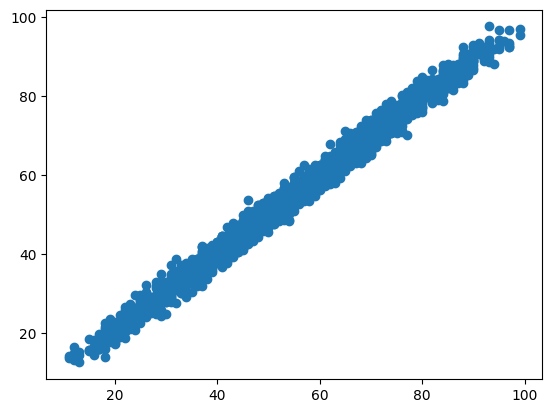

In [115]:
plt.scatter(y_test, predict)
plt.show()

In [116]:
r2_score(y_test,predict)

0.9889704960519785

In [117]:
model.coef_, model.intercept_ #gives all coefficients and intercepts in order

(array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144]),
 np.float64(-33.92194621555638))

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [119]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
model.score(X_train, y_train)

0.9886898790682355

In [121]:
predict = np.round(model.predict(X_test), decimals = 1)

In [122]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


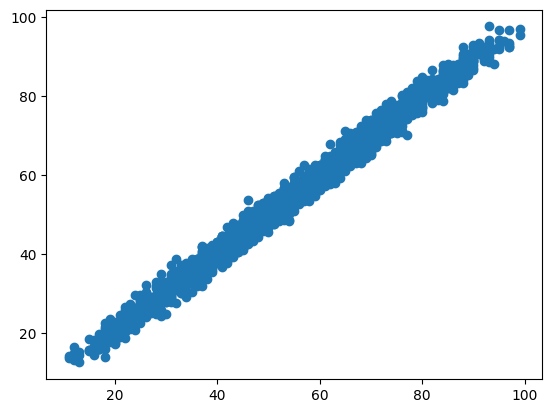

In [123]:
plt.scatter(y_test, predict)
plt.show()

In [124]:
r2_score(y_test,predict)

0.9889704960519785

In [125]:
model.coef_, model.intercept_

(array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144]),
 np.float64(-33.92194621555638))

## Try performing simple linear regression on each of these features indvidually

In [126]:
X_single_feature = data.drop(columns=["Sleep Hours", "Previous Scores", "Extracurricular Activities", "Hours Studied", "Performance Index"])
y = data["Performance Index"]
X_single_feature

,Sample Question Papers Practiced
0,1
1,2
2,2
3,2
4,5
...,...
9995,2
9996,5
9997,5
9998,0


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 1) (8000,) (2000, 1) (2000,)


In [128]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [129]:
model.score(X_train, y_train)

0.001926123641118882

In [130]:
predict = np.round(model.predict(X_test), decimals = 1)

In [131]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.5
4684,20.0,56.3
1731,46.0,55.4
4742,28.0,55.4
4521,41.0,55.7
...,...,...
6412,45.0,54.8
8285,66.0,54.8
7853,16.0,54.5
1095,65.0,55.4


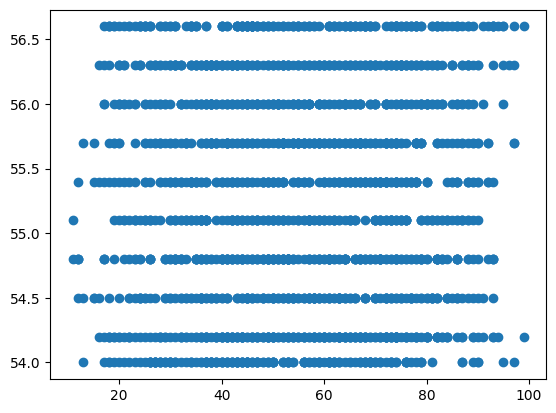

In [132]:
plt.scatter(y_test, predict)
plt.show()

In [133]:
r2_score(y_test,predict)

0.0010087588083272925

In [134]:
model.coef_, model.intercept_

(array([0.29453398]), np.float64(53.951783879471684))

People with high scores may be putting in lesser study hours. They may thus be correlated.
Multipple Linear Regression notes effects very specific to the X or particular feature.

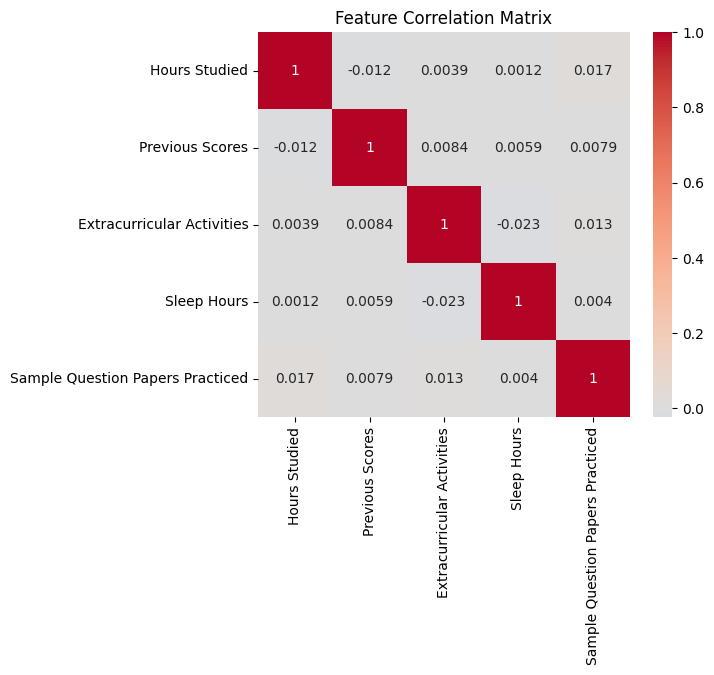

In [135]:
import seaborn as sns
corr = X.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

Let's try adding some correlation between Hours Studied and Question Papers Practiced

In [136]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [137]:
X["Hours Studied Correlated"] = round(X["Hours Studied"] - 0.05*X["Previous Scores"] + 0.1 * np.random.randn(len(X)))
X["Hours Studied Correlated"] = X["Hours Studied Correlated"].clip(lower=0) #removing the negative
X = X.drop(columns=["Hours Studied"])
X

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Hours Studied Correlated
0,99,1,9,1,2.0
1,82,0,4,2,-0.0
2,51,1,7,2,6.0
3,52,1,5,2,2.0
4,75,0,8,5,3.0
...,...,...,...,...,...
9995,49,1,4,2,0.0
9996,64,1,8,5,4.0
9997,83,1,8,5,2.0
9998,97,1,7,0,4.0


In [138]:
y = data["Performance Index"]

In [160]:
X.sample(5)

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Hours Studied Correlated
290,44,0,4,7,7.0
3531,85,1,5,4,1.0
4587,42,0,9,5,4.0
9846,95,1,5,8,0.0
7580,79,0,8,3,3.0


In [161]:
y.sample(5)

,Performance Index
4399,84.0
2458,39.0
7547,56.0
836,49.0
9027,65.0


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [163]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [164]:
model.score(X_train, y_train)

0.9719522368349447

In [144]:
predict = np.round(model.predict(X_test), decimals = 1)

In [145]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.4
4684,20.0,21.3
1731,46.0,47.3
4742,28.0,31.8
4521,41.0,42.1
...,...,...
6412,45.0,48.3
8285,66.0,59.5
7853,16.0,14.6
1095,65.0,63.5


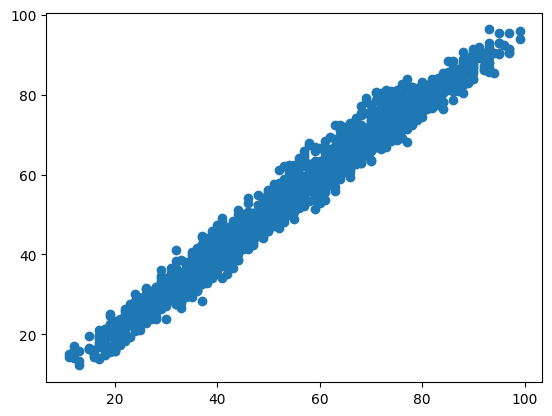

In [146]:
plt.scatter(y_test, predict)
plt.show()

In [147]:
r2_score(y_test,predict)

0.9750173857495129

In [149]:
model.coef_, model.intercept_ #gives all coefficients and intercepts in order

(array([1.13793645, 0.64637889, 0.4539248 , 0.19618089, 3.45958423]),
 np.float64(-35.09124256414008))

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 5) (8000,) (2000, 5) (2000,)


In [151]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [152]:
model.score(X_train, y_train)

0.9719522368349447

In [153]:
predict = np.round(model.predict(X_test), decimals = 1)

In [154]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.4
4684,20.0,21.3
1731,46.0,47.3
4742,28.0,31.8
4521,41.0,42.1
...,...,...
6412,45.0,48.3
8285,66.0,59.5
7853,16.0,14.6
1095,65.0,63.5


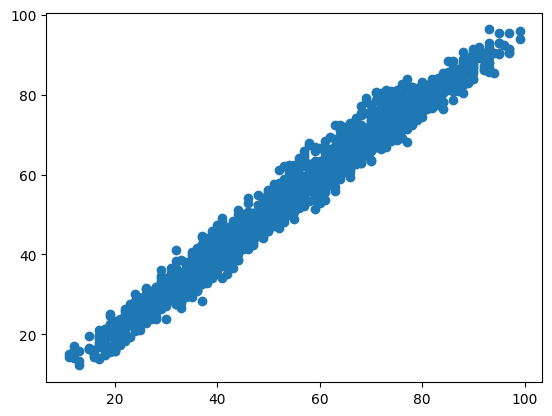

In [155]:
plt.scatter(y_test, predict)
plt.show()

In [156]:
r2_score(y_test,predict)

0.9750173857495129

In [157]:
model.coef_, model.intercept_

(array([1.13793645, 0.64637889, 0.4539248 , 0.19618089, 3.45958423]),
 np.float64(-35.09124256414008))

In [158]:
X_single_feature = data.drop(columns=["Sleep Hours", "Previous Scores", "Extracurricular Activities", "Sample Question Papers Practiced", "Performance Index"])
y = data["Performance Index"]
X_single_feature

,Hours Studied
0,7
1,4
2,8
3,5
4,7
...,...
9995,1
9996,7
9997,6
9998,9


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_single_feature, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8000, 1) (8000,) (2000, 1) (2000,)
